In [1]:
# setting logging to print only error messages
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mutual_inf_features.csv')

In [3]:
df.head()

,usd_price,royalty_fee,days_since_minting,platform_fee,resale_value,_median_resale_price,Mouth,Fur,Eyes,Background,price_volatility
0,26236.07,0.17500,5,0.17500,0.00,NaN,M1 Dumbfounded,M1 Cream,M1 Eyepatch,M1 Gray,NaN
1,71858.40,0.50000,41,0.50000,0.00,NaN,M1 Bored,M1 Brown,M1 Bored,M1 Blue,NaN
2,48053.48,0.41000,186,0.41000,-23804.92,48053.48,M1 Bored,M1 Brown,M1 Bored,M1 Blue,3984.754783
3,49593.68,0.44375,200,0.44375,1540.20,48053.48,M1 Bored,M1 Brown,M1 Bored,M1 Blue,3984.754783
4,42051.90,0.55000,351,0.55000,-7541.78,48053.48,M1 Bored,M1 Brown,M1 Bored,M1 Blue,3984.754783


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94027 entries, 0 to 94026
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   usd_price             94027 non-null  float64
 1   royalty_fee           94027 non-null  float64
 2   days_since_minting    94027 non-null  int64  
 3   platform_fee          94027 non-null  float64
 4   resale_value          94027 non-null  float64
 5   _median_resale_price  71183 non-null  float64
 6   Mouth                 94023 non-null  object 
 7   Fur                   94023 non-null  object 
 8   Eyes                  94023 non-null  object 
 9   Background            94023 non-null  object 
 10  price_volatility      66462 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 7.9+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoders = {}

# Columns to be label encoded
columns_to_encode = ['Background', 'Fur', 'Eyes', 'Mouth']

# Apply label encoding to each column
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the first few rows of the transformed dataset
df.head()

,usd_price,royalty_fee,days_since_minting,platform_fee,resale_value,_median_resale_price,Mouth,Fur,Eyes,Background,price_volatility
0,26236.07,0.17500,5,0.17500,0.00,NaN,44,14,25,7,NaN
1,71858.40,0.50000,41,0.50000,0.00,NaN,25,12,20,6,NaN
2,48053.48,0.41000,186,0.41000,-23804.92,48053.48,25,12,20,6,3984.754783
3,49593.68,0.44375,200,0.44375,1540.20,48053.48,25,12,20,6,3984.754783
4,42051.90,0.55000,351,0.55000,-7541.78,48053.48,25,12,20,6,3984.754783


In [6]:
df.isnull().sum()

usd_price                   0
royalty_fee                 0
days_since_minting          0
platform_fee                0
resale_value                0
_median_resale_price    22844
Mouth                       0
Fur                         0
Eyes                        0
Background                  0
price_volatility        27565
dtype: int64

In [7]:
null_counts = df.isnull().sum()

# Fill null values with zeros
df.fillna(-9999, inplace=True)

In [8]:
corr_matrix = df.corr(method='spearman')
corr_matrix['usd_price'].sort_values(ascending=False)

usd_price               1.000000
royalty_fee             0.690742
_median_resale_price    0.568483
platform_fee            0.529615
days_since_minting      0.452899
price_volatility        0.352088
resale_value            0.341852
Mouth                   0.087411
Fur                     0.064623
Eyes                    0.051025
Background              0.030909
Name: usd_price, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split


# Define the bins for usd_price
bins = [0, 25000, 120000, 375000, np.inf]
labels = [1, 2, 3, 4]
df['price_cat'] = pd.cut(df['usd_price'], bins=bins, labels=labels)

# Perform a stratified train-test split based on the price categories
train_set, test_set = train_test_split(df, test_size=0.2, random_state=7, stratify=df['price_cat'])

# Drop the 'price_cat' column as it's no longer needed
train_set = train_set.drop('price_cat', axis=1)
test_set =  test_set.drop('price_cat', axis=1)

train_set.shape, test_set.shape


((75221, 11), (18806, 11))

In [10]:
train_set.head()

,usd_price,royalty_fee,days_since_minting,platform_fee,resale_value,_median_resale_price,Mouth,Fur,Eyes,Background,price_volatility
36877,25769.80,0.35000,278,0.35000,-72155.39,28406.300,43,27,24,11,23672.784820
55684,8560.77,0.08200,44,0.08200,7105.39,9929.265,19,6,5,22,1935.344189
57165,86761.15,0.00000,591,0.00000,1010.24,86970.690,20,2,8,2,46958.612920
66032,687.42,0.00600,0,0.00600,0.00,-9999.000,0,4,5,2,-9999.000000
35482,2447.23,0.01725,6,0.01725,105.74,2447.230,19,3,12,1,3789.229999


In [11]:
test_set.head()

,usd_price,royalty_fee,days_since_minting,platform_fee,resale_value,_median_resale_price,Mouth,Fur,Eyes,Background,price_volatility
60613,24802.79,0.075379,550,0.0000,-15.53,24528.00,51,21,21,4,2588.536338
84739,18168.64,0.000000,479,0.0000,-797.91,18151.54,53,21,17,6,810.481519
4558,8741.70,0.112500,73,0.1125,6996.72,105113.98,98,4,6,22,45827.742870
58077,76905.42,0.000000,595,0.0000,226.02,81207.93,9,5,8,2,42236.368560
70894,65328.13,0.436100,125,0.4361,39864.03,55687.06,67,29,44,16,8425.357348


In [12]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler instance
scaler = RobustScaler()

# Separate the target variable and predictors
trainset_target = train_set[['usd_price']].values
trainset_predictors = train_set.drop(['usd_price'], axis=1)

# Apply the RobustScaler to the predictor variables
scaled_vals = scaler.fit_transform(trainset_predictors)
train_set = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# Put the non-scaled target variable back in
train_set[['usd_price']] = trainset_target

# Inspect the data
train_set.head()


,royalty_fee,days_since_minting,platform_fee,resale_value,_median_resale_price,Mouth,Fur,Eyes,Background,price_volatility,usd_price
0,0.566634,0.320099,0.518496,-11.677775,0.100021,0.290323,0.7500,0.10,0.375,0.447620,25769.80
1,-0.186069,-0.260546,-0.131595,1.142366,-0.307687,-0.483871,-0.5625,-0.85,1.750,-0.117479,8560.77
2,-0.416374,1.096774,-0.330503,0.156498,1.392282,-0.451613,-0.8125,-0.70,-0.750,1.052972,86761.15
3,-0.399523,-0.369727,-0.315949,-0.006905,-0.747417,-1.096774,-0.6875,-0.85,-0.750,-0.427731,687.42
4,-0.367926,-0.354839,-0.288660,0.010198,-0.472783,-0.483871,-0.7500,-0.50,-0.875,-0.069284,2447.23


In [13]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler instance
scaler = RobustScaler()

# Fit the transformer on the training set
scaler.fit(trainset_predictors)

# Separate the target variable and predictors in the test set
testset_target = test_set["usd_price"].values
testset_predictors = test_set.drop("usd_price", axis=1)

# Apply the RobustScaler to the predictor variables in the test set
scaled_vals = scaler.transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# Put the non-scaled target variable back in the test set DataFrame
test_set['usd_price'] = testset_target

# Inspect the modified test set
test_set.head()


,royalty_fee,days_since_minting,platform_fee,resale_value,_median_resale_price,Mouth,Fur,Eyes,Background,price_volatility,usd_price
0,-0.204664,0.995037,-0.330503,-0.009417,0.014444,0.548387,0.3750,-0.05,-0.50,-0.100498,24802.79
1,-0.416374,0.818859,-0.330503,-0.135964,-0.126257,0.612903,0.3750,-0.25,-0.25,-0.146722,18168.64
2,-0.100407,-0.188586,-0.057611,1.124789,1.792626,2.064516,-0.6875,-0.80,1.75,1.023573,8741.70
3,-0.416374,1.106700,-0.330503,0.029653,1.265123,-0.806452,-0.6250,-0.70,-0.75,0.930210,76905.42
4,0.808454,-0.059553,0.727350,6.440956,0.701989,1.064516,0.8750,1.10,1.00,0.051239,65328.13


In [14]:
# drop labels for training set, but keep all others
Xtrain = train_set.drop("usd_price", axis=1)

ytrain = train_set["usd_price"].copy()

# drop labels for training set, but keep all others
Xtest = test_set.drop("usd_price", axis=1)

ytest = test_set["usd_price"].copy()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Fit the Decision Tree Regressor model on the training data
tree_reg = DecisionTreeRegressor()
tree_reg.fit(Xtrain, ytrain)

# Make predictions on the training data
yhat_train = tree_reg.predict(Xtrain)
yhat_test = tree_reg.predict(Xtest)

# Calculate RMSE and MAE on the training data
train_rmse = np.sqrt(mean_squared_error(ytrain, yhat_train))
train_mae = mean_absolute_error(ytrain, yhat_train)

# Calculate RMSE and MAE on the test data
test_rmse = np.sqrt(mean_squared_error(ytest, yhat_test))
test_mae = mean_absolute_error(ytest, yhat_test)

# Print the results
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

Training RMSE: 1.9787700886658501
Training MAE: 0.027536592175086503
Test RMSE: 29508.26920184488
Test MAE: 3745.367354197065


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Create a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Define a custom scoring function for MAE
scoring = {
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Perform cross-validation and calculate both RMSE and MAE for both training and test data
cv_results = cross_validate(tree_reg, Xtrain, ytrain, scoring=scoring, cv=10, return_train_score=True)

# Extract RMSE and MAE scores for training and test data
train_rmse_scores = -cv_results['train_neg_root_mean_squared_error']
test_rmse_scores = -cv_results['test_neg_root_mean_squared_error']

train_mae_scores = -cv_results['train_neg_mean_absolute_error']
test_mae_scores = -cv_results['test_neg_mean_absolute_error']

def display_scores(scores, metric, data_type):
    print(f"{data_type} {metric} Scores:")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Calculate and display the mean and standard deviation of RMSE and MAE for training and test data
display_scores(train_rmse_scores, "RMSE", "Training")
display_scores(test_rmse_scores, "RMSE", "Test")

display_scores(train_mae_scores, "MAE", "Training")
display_scores(test_mae_scores, "MAE", "Test")


Training RMSE Scores:
Scores: [1.73960221 2.08580527 1.99025268 2.03663941 1.97975127 1.81572743
 2.08579895 1.54689893 1.5820723  1.81408552]
Mean: 1.8676633979060007
Standard deviation: 0.18913842441944392
Test RMSE Scores:
Scores: [25438.74632803 35720.70899725 31718.40459985 19146.28147082
 14834.39395318 27364.5995941  16509.66324398 19168.61085373
 20429.18192563 25742.60182599]
Mean: 23607.319279256124
Standard deviation: 6415.599078162407
Training MAE Scores:
Scores: [0.02142471 0.03059617 0.02720409 0.02812361 0.02604677 0.02268926
 0.03056825 0.0198483  0.02046012 0.02148363]
Mean: 0.02484449020624824
Standard deviation: 0.003942447917275509
Test MAE Scores:
Scores: [3787.69644474 3756.05369838 4106.74522983 3513.27698652 3321.23394453
 3625.68704707 3467.13185826 3727.39249269 3617.6668099  3637.66100703]
Mean: 3656.0545518939434
Standard deviation: 201.60773528297128


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create a Random Forest Regressor model
rf_reg = RandomForestRegressor()

# Fit the model on the training data (Xtrain and ytrain)
rf_reg.fit(Xtrain, ytrain)

# Make predictions on the training and test data
yhat_train = rf_reg.predict(Xtrain)
yhat_test = rf_reg.predict(Xtest)

# Calculate RMSE and MAE on the training data
train_rmse = np.sqrt(mean_squared_error(ytrain, yhat_train))
train_mae = mean_absolute_error(ytrain, yhat_train)

# Calculate RMSE and MAE on the test data
test_rmse = np.sqrt(mean_squared_error(ytest, yhat_test))
test_mae = mean_absolute_error(ytest, yhat_test)

# Print the results
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Training RMSE: 7569.560148410242
Training MAE: 1002.5056731692114
Test RMSE: 23274.24678756241
Test MAE: 2808.8430836952784


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a RandomForestRegressor instance
forest_reg = RandomForestRegressor(n_estimators=10, random_state=7)

# Fit the model to the training data
forest_reg.fit(Xtrain, ytrain)

# Predict on train and test sets
y_train_pred = forest_reg.predict(Xtrain)
y_test_pred = forest_reg.predict(Xtest)

# Calculate RMSE and MAE for train set
train_rmse = np.sqrt(mean_squared_error(ytrain, y_train_pred))
train_mae = mean_absolute_error(ytrain, y_train_pred)

# Calculate RMSE and MAE for test set
test_rmse = np.sqrt(mean_squared_error(ytest, y_test_pred))
test_mae = mean_absolute_error(ytest, y_test_pred)

# Perform cross-validation and calculate RMSE and MAE scores
rmse_scores = np.sqrt(-cross_val_score(forest_reg, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10))
mae_scores = -cross_val_score(forest_reg, Xtrain, ytrain, scoring="neg_mean_absolute_error", cv=10)

# Display the scores
def display_scores(rmse_scores, mae_scores, train_rmse, train_mae, test_rmse, test_mae):
    print("Cross-Validation RMSE Scores:", rmse_scores)
    print("Mean Cross-Validation RMSE:", rmse_scores.mean())
    print("Cross-Validation MAE Scores:", mae_scores)
    print("Mean Cross-Validation MAE:", mae_scores.mean())
    print("\nTrain RMSE:", train_rmse)
    print("Train MAE:", train_mae)
    print("\nTest RMSE:", test_rmse)
    print("Test MAE:", test_mae)

display_scores(rmse_scores, mae_scores, train_rmse, train_mae, test_rmse, test_mae)


Cross-Validation RMSE Scores: [11585.01222643 25318.2392333  26190.62760877 20134.45637696
 11876.39390919 29572.20637131 12170.71953111 16227.41170544
 12781.7022395  23356.34178577]
Mean Cross-Validation RMSE: 18921.311098777987
Cross-Validation MAE Scores: [2738.04644171 2875.60212169 3332.24624004 3129.62325791 2613.72218329
 3277.68141504 2729.40039085 3143.39357646 2753.15903943 3119.83735647]
Mean Cross-Validation MAE: 2971.2712022890582

Train RMSE: 9046.372167458681
Train MAE: 1177.0206111908567

Test RMSE: 27708.09356944142
Test MAE: 3123.513696493479


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Specify the hyperparameters and their values
param_grid = {
    'n_estimators': [3, 10, 30],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

forest_reg = RandomForestRegressor(random_state=7)

# Specify the scoring metrics as a list of strings
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MAE': make_scorer(mean_absolute_error, greater_is_better=False)}

# We'll use 10-fold cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring=scoring, 
                           return_train_score=True, verbose=2,
                           refit='RMSE')  # Refit based on RMSE to get best estimator

grid_search.fit(Xtrain, ytrain)

# Access the results including RMSE and MAE scores
results = grid_search.cv_results_
rmse_scores = np.sqrt(-results['mean_test_RMSE'])
mae_scores = -results['mean_test_MAE']

# Print RMSE and MAE scores for different hyperparameter combinations
for rmse, mae, params in zip(rmse_scores, mae_scores, results['params']):
    print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f} for {params}')

# Predict using the best estimator
best_estimator = grid_search.best_estimator_
y_train_pred = best_estimator.predict(Xtrain)
y_test_pred = best_estimator.predict(Xtest)

# Calculate RMSE and MAE for train set
train_rmse = np.sqrt(mean_squared_error(ytrain, y_train_pred))
train_mae = mean_absolute_error(ytrain, y_train_pred)

# Calculate RMSE and MAE for test set
test_rmse = np.sqrt(mean_squared_error(ytest, y_test_pred))
test_mae = mean_absolute_error(ytest, y_test_pred)

print("\nTrain RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("\nTest RMSE:", test_rmse)
print("Test MAE:", test_mae)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.2s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END ..max_depth=4, min_samples_split=2, n

[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.5s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.4s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.4s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.4s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   1.4s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=30; total time=   4.2s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=30; total time=   4.1s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=30; total time=   4.1s
[CV] END ..max_depth=6, min_

[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=   5.4s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=   5.6s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=   5.5s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=   5.4s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=   5.6s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=   5.3s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=   5.5s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=8, min

[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   1.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   1.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   1.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   1.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   1.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   1.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   4.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   4.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   4.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   4.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   4.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   4.7s
[CV] END max_depth=Non

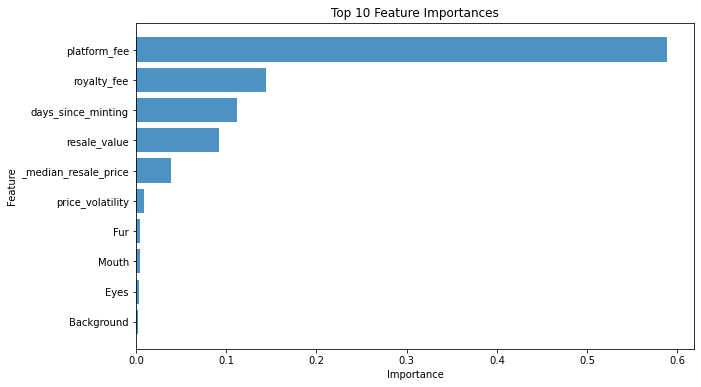

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importances from the best estimator
feature_importances = best_estimator.feature_importances_

# Create a DataFrame for the feature importances
features = pd.DataFrame({
    'feature': Xtrain.columns,  # assuming Xtrain is a DataFrame
    'importance': feature_importances
})

# Sort the features by importance
features = features.sort_values(by='importance', ascending=False)

# Plot the top N features' importances
top_n = 10  # Change this to show more or fewer features
plt.figure(figsize=(10, 6))
plt.barh(features['feature'][:top_n], features['importance'][:top_n], align='center', alpha=0.8)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [20]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [21]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your data in Xtrain, ytrain, Xtest, and ytest
# These are the training and testing sets you mentioned

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_reg.fit(Xtrain, ytrain)

# Make predictions on the training and testing data
y_train_pred = xgb_reg.predict(Xtrain)
y_test_pred = xgb_reg.predict(Xtest)

# Calculate and print the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for both train and test sets
train_mae = mean_absolute_error(ytrain, y_train_pred)
test_mae = mean_absolute_error(ytest, y_test_pred)
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)

print(f"Train Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")


Train Mean Absolute Error (MAE): 2863.49
Test Mean Absolute Error (MAE): 4291.76
Train Root Mean Squared Error (RMSE): 6548.72
Test Root Mean Squared Error (RMSE): 24542.31


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2, 0.3]
}

# Create the XGBoostRegressor
xgb_model = XGBRegressor(random_state=42)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=100, 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the random search to your data
random_search.fit(Xtrain, ytrain)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_xgb_model.predict(Xtrain)
y_test_pred = best_xgb_model.predict(Xtest)

# Calculate and print scores
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)

train_mae = mean_absolute_error(ytrain, y_train_pred)
test_mae = mean_absolute_error(ytest, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)

Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.2, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.9}
Training RMSE: 13668.046063986358
Testing RMSE: 20209.015640872403
Training MAE: 4660.9414652193145
Testing MAE: 5193.32661845686


In [33]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor


# New hyperparameter grid
param_grid_refined = {
    'n_estimators': [150, 200, 250, 300],  # Around the previously found best value
    'max_depth': [2, 3, 4, 5],  # Slightly lower values to prevent potential overfitting
    'learning_rate': [0.005, 0.01, 0.05, 0.1],  # Introduced a smaller learning rate
    'subsample': [0.6, 0.7, 0.8, 0.9],  # Introduced a slightly lower subsample value
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],  # Similarly, a slightly lower value
    'gamma': [0, 0.05, 0.1, 0.15],  # Introduced a smaller gamma value
    'reg_alpha': [0, 0.05, 0.1, 0.5, 1, 1.5],  # Expanded range for L1 regularization
    'reg_lambda': [0.5, 1, 1.5, 2, 2.5, 3]  # Expanded range for L2 regularization
}


# Split data into training and validation sets for early stopping
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

# Create the XGBoostRegressor
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)  # n_jobs=-1 to use all available cores

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=500, 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the random search with early stopping
eval_set = [(X_val_sub, y_val_sub)]
random_search.fit(X_train_sub, y_train_sub, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=False)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_xgb_model.predict(Xtrain)
y_test_pred = best_xgb_model.predict(Xtest)

# Calculate and print scores
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)

train_mae = mean_absolute_error(ytrain, y_train_pred)
test_mae = mean_absolute_error(ytest, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)

C:\Users\Kapil\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Kapil\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Kapil\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Kapil\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Training RMSE: 18014.238790516065
Testing RMSE: 22863.834471510287
Training MAE: 5070.766230007606
Testing MAE: 5567.7441987913635


In [34]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize a CatBoostRegressor model with default parameters
catboost_default_model = CatBoostRegressor(verbose=0)

# Fit the model to the training data
catboost_default_model.fit(Xtrain, ytrain)

# Make predictions
y_pred_train_default = catboost_default_model.predict(Xtrain)
y_pred_test_default = catboost_default_model.predict(Xtest)

# Calculate RMSE and MAE for evaluation for both train and test sets
rmse_train_default = np.sqrt(mean_squared_error(ytrain, y_pred_train_default))
mae_train_default = mean_absolute_error(ytrain, y_pred_train_default)

rmse_test_default = np.sqrt(mean_squared_error(ytest, y_pred_test_default))
mae_test_default = mean_absolute_error(ytest, y_pred_test_default)

print("\nTrain Data (Default Model):")
print("CatBoost RMSE:", rmse_train_default)
print("CatBoost MAE:", mae_train_default)

print("\nTest Data (Default Model):")
print("CatBoost RMSE:", rmse_test_default)
print("CatBoost MAE:", mae_test_default)



Train Data (Default Model):
CatBoost RMSE: 7780.505364537686
CatBoost MAE: 3362.602795971699

Test Data (Default Model):
CatBoost RMSE: 19419.881159291388
CatBoost MAE: 4256.082048401512


In [35]:
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Create a CatBoostRegressor model 
catboost_model = CatBoostRegressor(verbose=0)

# Using RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Fit the random search to the training data
random_search.fit(Xtrain, ytrain)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a new CatBoost model with the best hyperparameters
best_catboost_model = CatBoostRegressor(**best_params, verbose=0)
best_catboost_model.fit(Xtrain, ytrain)

# Make predictions
y_pred_train = best_catboost_model.predict(Xtrain)
y_pred_test = best_catboost_model.predict(Xtest)

# Calculate RMSE and MAE for evaluation for both train and test sets
rmse_train = np.sqrt(mean_squared_error(ytrain, y_pred_train))
mae_train = mean_absolute_error(ytrain, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(ytest, y_pred_test))
mae_test = mean_absolute_error(ytest, y_pred_test)

print("Best Hyperparameters:", best_params)
print("\nTrain Data:")
print("CatBoost RMSE:", rmse_train)
print("CatBoost MAE:", mae_train)
print("\nTest Data:")
print("CatBoost RMSE:", rmse_test)
print("CatBoost MAE:", mae_test)

# Visualizations
# ... (Use the previously provided visualization code here)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Kapil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kapil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kapil\anaconda3\lib\site-packages\catboost\core.py", line 5703, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\Kapil\anaconda3\lib\site-packages\catboost\core.py", line 2303, in _fit


TypeError: __init__() got an unexpected keyword argument 'reg_alpha'

In [19]:
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create a CatBoostRegressor model
catboost_model = CatBoostRegressor(verbose=0)

# Define the hyperparameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 4, 5, 6],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.1, 0.5, 1.0],
    'border_count': [32, 64, 128],
}

# Using RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=catboost_model, param_distributions=param_grid, n_iter=100,
    cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42
)

# Fit the random search to the training data
random_search.fit(Xtrain, ytrain)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a new CatBoost model with the best hyperparameters
best_catboost_model = CatBoostRegressor(**best_params, verbose=0)
best_catboost_model.fit(Xtrain, ytrain)

# Make predictions
y_pred_train = best_catboost_model.predict(Xtrain)
y_pred_test = best_catboost_model.predict(Xtest)

# Calculate RMSE and MAE for evaluation for both train and test sets
rmse_train = np.sqrt(mean_squared_error(ytrain, y_pred_train))
mae_train = mean_absolute_error(ytrain, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(ytest, y_pred_test))
mae_test = mean_absolute_error(ytest, y_pred_test)

print("Best Hyperparameters:", best_params)
print("\nTrain Data:")
print("CatBoost RMSE:", rmse_train)
print("CatBoost MAE:", mae_train)
print("\nTest Data:")
print("CatBoost RMSE:", rmse_test)
print("CatBoost MAE:", mae_test)

# Visualizations
# ... (Use the previously provided visualization code here)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 5, 'border_count': 128, 'bagging_temperature': 1.0}

Train Data:
CatBoost RMSE: 16475.161882828474
CatBoost MAE: 5657.92297213778

Test Data:
CatBoost RMSE: 24023.785036822206
CatBoost MAE: 6150.527010265296
